<a href="https://colab.research.google.com/github/JesseSchwartz25/cvis-spring2021/blob/main/Jesse's_Lecture7_tutorial_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image gradients, denoisy


In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
from skimage import data
from skimage.color import rgb2gray
import copy as C

Read in an image. You can read in any image.  replace with any image of your choice below. 

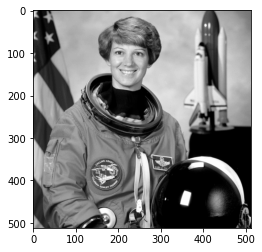

In [ ]:
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')


### image derivative
###  set up filters
### take derivative

In [ ]:
dx = np.array([1,-1])
s1 = np.array([1,1])
dy = np.array([1,-1])
s =s1[None,:]

##Demo: convolve with the image using above filters
###hint: using convolve1d, first convolve in x directon and then in y. 

In [ ]:
x = ndimage.convolve1d(img,dx,axis= 0)

gx_I = ndimage.convolve(x,s)

y = ndimage.convolve1d(img,dx,axis= 1)
gy_I = ndimage.convolve(y,s)
# alternative, you can use np.gradient()
gx_I,gy_I = np.gradient(img)[:2]

## Exericse 1: image filtering
### Can you design a smooth gradient filter that just perform the convolution operation once and extracct the edge of the images?  Think of what type of filter it is. 
### plot the gradients images and the magnitudes, use subplot.


(-0.5, 511.5, 511.5, -0.5)

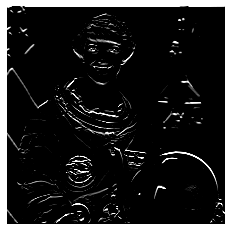

In [ ]:
# Gx = np.array([[1, 0, -1], [2, 0 -2], [1, 0 ,-1]])
# out = ndimage.convolve1d(img, Gx, axis=0)


# out = ndimage.convolve(np.array([[1, 0, -1], [2, 0 -2], [1, 0 ,-1]]))
x = ndimage.sobel(img, axis=0, mode="constant")

plt.imshow(x, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')



(-0.5, 511.5, 511.5, -0.5)

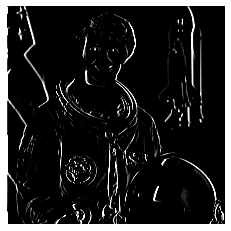

In [ ]:
y = ndimage.sobel(img, axis=1, mode="constant")

plt.imshow(y, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

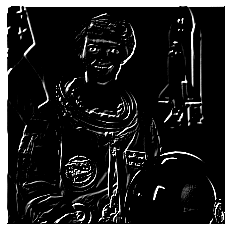

In [ ]:
both = x + y



plt.imshow(both, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

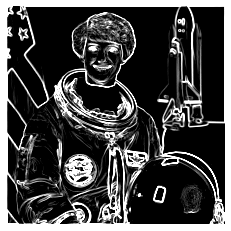

In [ ]:
mags = np.hypot(x, y)

plt.imshow(mags, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

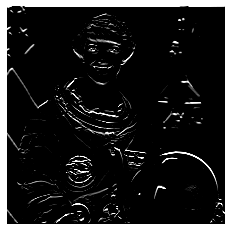

In [ ]:
im = ndimage.gaussian_filter(img, 8)
sx =  ndimage.sobel(img, axis=0, mode="constant")

plt.imshow(sx, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')

Text(0.5, 1.0, 'Magnitude of edges')

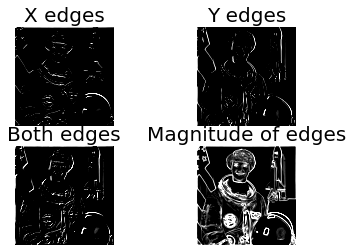

In [ ]:
plt.subplot(2,2,1)
plt.imshow(x, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('X edges', fontsize=20)

plt.subplot(2,2,2)
plt.imshow(y, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Y edges', fontsize=20)


plt.subplot(2,2,3)
plt.imshow(both, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Both edges', fontsize=20)

plt.subplot(2,2,4)
plt.imshow(mags, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Magnitude of edges', fontsize=20)

# Exercise 2: Image De-noise. Add salt and pepper to the image 

In [ ]:
noisy = img + 0.4 * img.std() * np.random.random(img.shape)
# # adding salt and peper noise to the image 
# # adding salt
num_salt = np.ceil(0.05 * img.size * 0.5)
coords = [np.random.randint(0, i - 1, int(num_salt))
                 for i in img.shape]
out=C.copy(img)                
out[coords] = 255
# # adding pepper
num_pepper = np.ceil(0.05* img.size * (1. - 0.05))
coords = [np.random.randint(0, i - 1, int(num_pepper))
                   for i in img.shape]
out[coords] = 0
out=out.reshape(img.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


Text(0.5, 1.0, 'added gaussian noise')

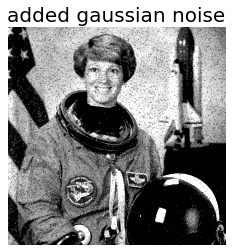

In [ ]:
plt.figure()
plt.imshow(out, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('added gaussian noise', fontsize=20)

## gaussian denoise?
## can you remove the noise by using guassian filter? try also box filter and median filter. nd.gaussian_filter, etc. 
## plot the denised image. Plot as subplots. 

Text(0.5, 1.0, 'box filter')

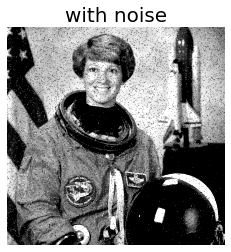

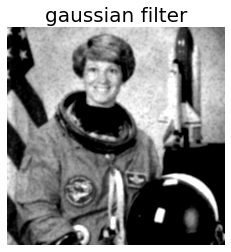

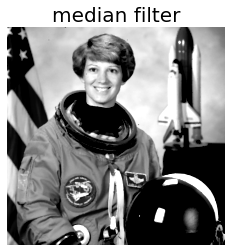

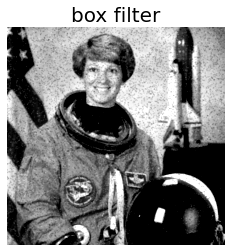

In [ ]:
denoised = ndimage.gaussian_filter(out, 2)

denoised2 = ndimage.median_filter(out, 3)

denoised3 = ndimage.convolve(out, np.array([[1,1,1],[1,1,1],[1,1,1]])/9)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(out, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('with noise', fontsize=20)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('gaussian filter', fontsize=20)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(denoised2, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('median filter', fontsize=20)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(denoised3, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('box filter', fontsize=20)



# Exercise 3: 
a) Generate an image of a rotated rectangle. you can create a rectnagle by filling center pixels 1 and the rest zero. ndimage.rotate can be used to roate the image. 
b) Blur the image using a Guassian filter. 
c) apply sobel filter to both x and y directon
d) Display the original image, x-derivatives, y-derivatives. use np.hypot to compute the magnitude. 

Text(0.5, 1.0, 'Magnitude of blurred edges')

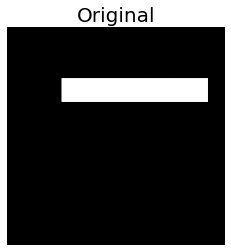

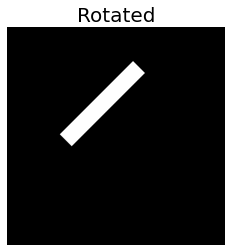

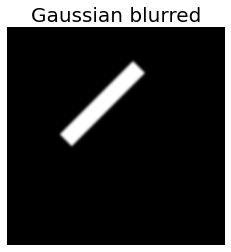

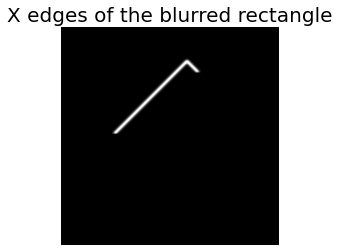

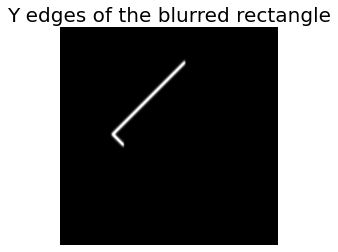

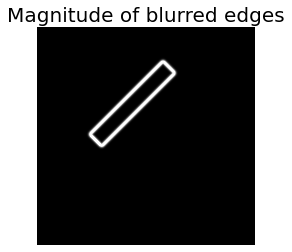

In [ ]:
im = np.zeros((256,256))
im[60:88,64:-20] = 1

plt.figure()
plt.subplot(1,1,1)
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title("Original", fontsize=20)




rot = ndimage.rotate(im, 45)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(rot, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title("Rotated", fontsize=20)


rotblur = ndimage.gaussian_filter(rot, sigma=2)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(rotblur, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title("Gaussian blurred", fontsize=20)

rotx = ndimage.sobel(rotblur, axis=0, mode="constant")

plt.figure()
plt.subplot(1,1,1)
plt.imshow(rotx, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title("X edges of the blurred rectangle", fontsize=20)

roty = ndimage.sobel(rotblur, axis=1, mode="constant")

plt.figure()
plt.subplot(1,1,1)
plt.imshow(roty, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title("Y edges of the blurred rectangle", fontsize=20)

rotmag = np.hypot(rotx, roty)

plt.figure()
plt.subplot(1,1,1)
plt.imshow(rotmag, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title("Magnitude of blurred edges", fontsize=20)
